In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.special import lpmv
from scipy.special import sph_harm
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors

#from scipy.special import assoc_laguerre

%matplotlib notebook

## Legendre Polynomials

The functions $P_l(x)$ are called **Legendre polynomials**, and one way of defining them is via the **Rodrigues formula**:

$$P_l(x) = \frac{1}{2^ll!}\left( \frac{d}{dx} \right)^l(x^2-1)^l$$

The Legendre polynomials are defined on $|x|<1$.  In physics, we often make use of the Legendre polynomials with $x=\cos \theta$.

In [2]:
ls = [0,1,2,3]

<IPython.core.display.Javascript object>


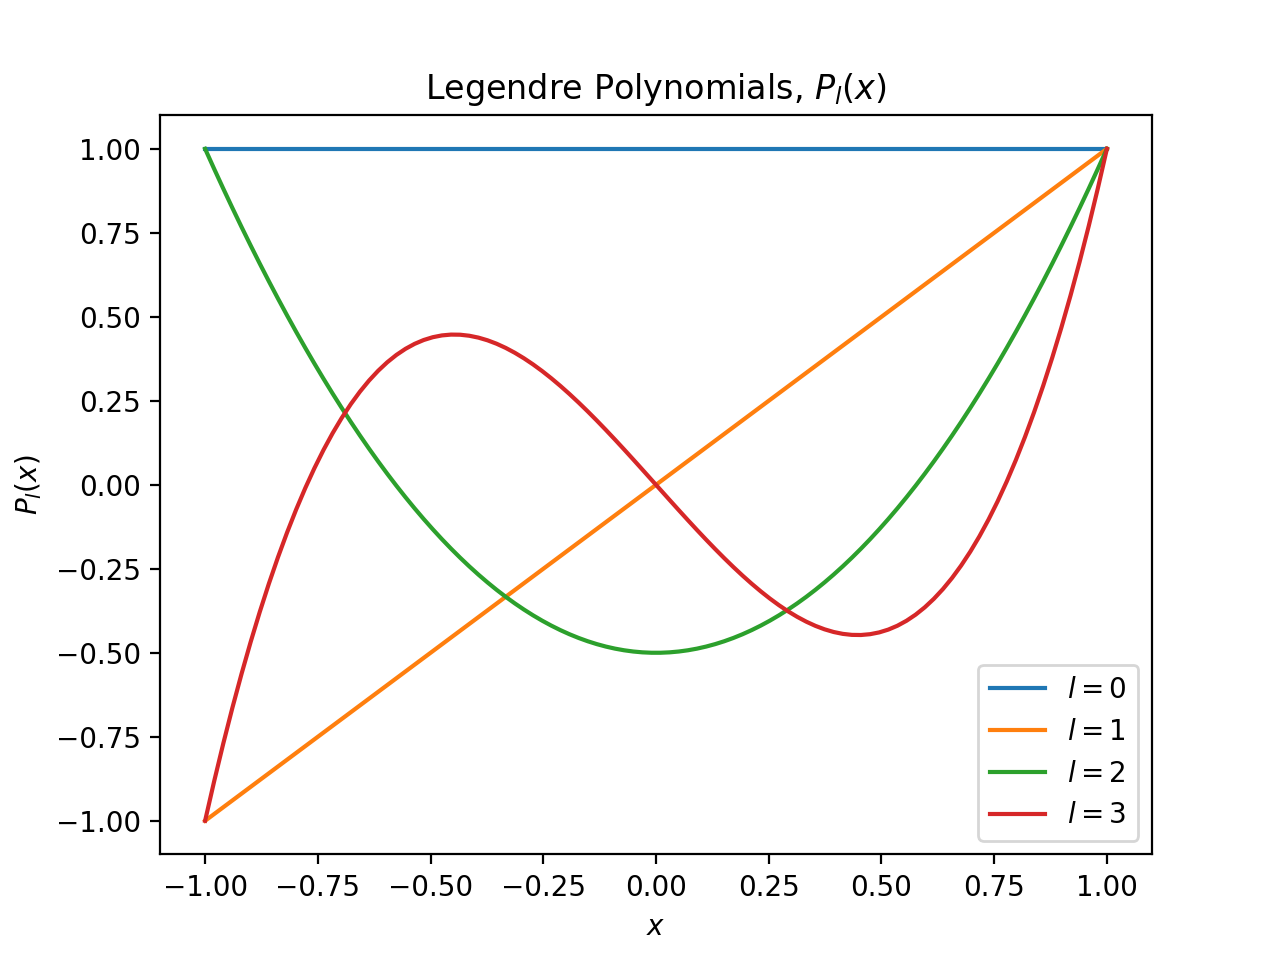

In [3]:
x=np.linspace(-1,1,100)

plt.figure()

for l in ls:
    plt.plot(x,lpmv(0,l,x),label=r'$l=$'+str(l))
plt.title(r'Legendre Polynomials, $P_l(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$P_l(x)$')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


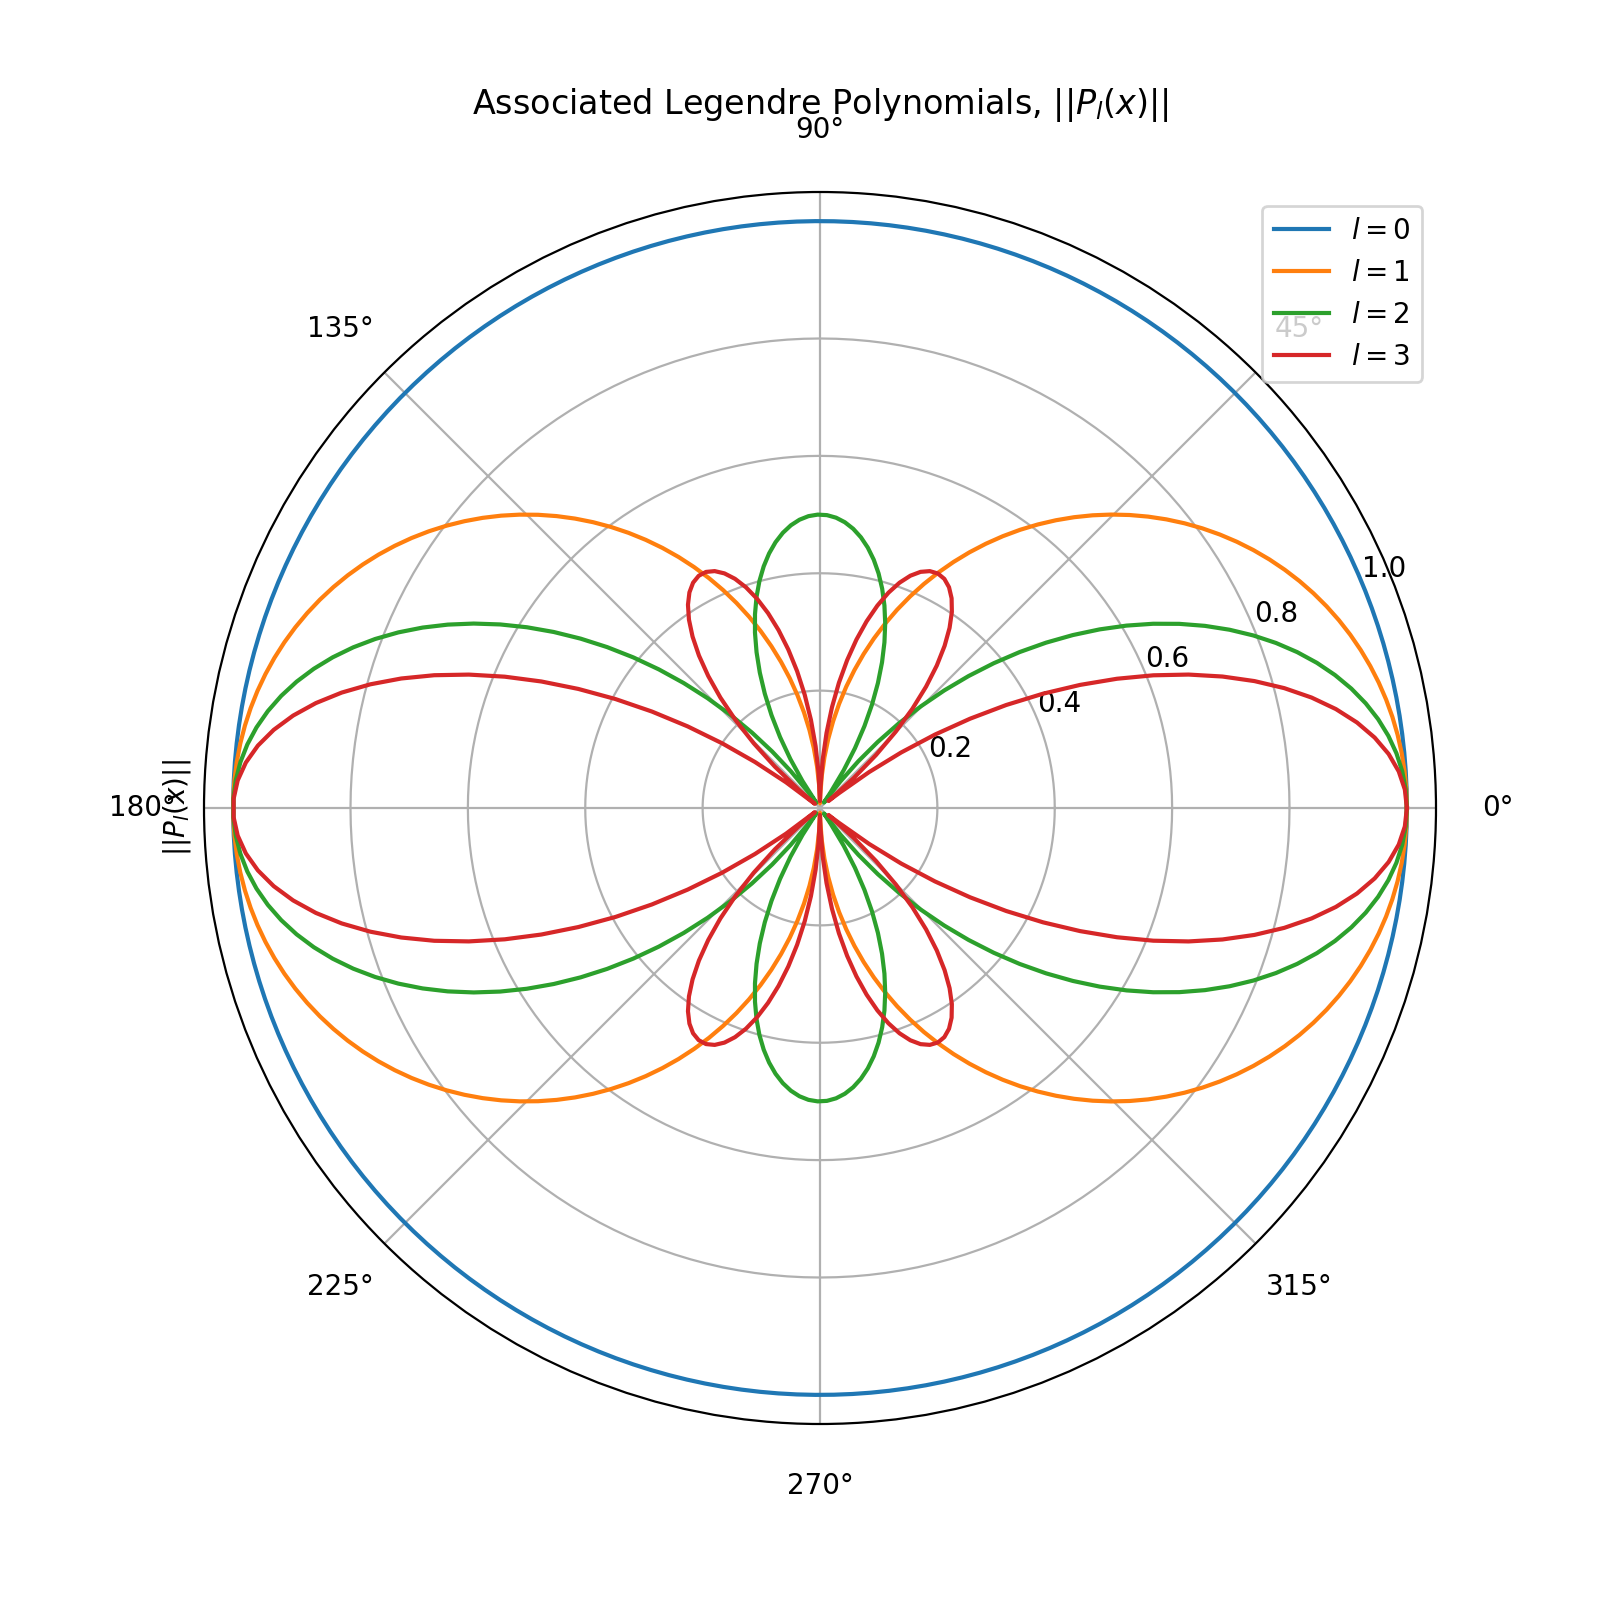

In [4]:
thetas = np.linspace(0,2*np.pi,200)

plt.figure(figsize=(8,8))
for i in range(0, len(ls)):
    l=ls[i]
    r = lpmv(0,l,np.cos(thetas))
    plt.polar(thetas, abs(r),label=r'$l=$'+str(l))
plt.title(r'Associated Legendre Polynomials, $||P_l(x)||$')
plt.ylabel(r'$||P_l(x)||$')
plt.legend()
plt.show()

## Associated Legendre Polynomials

The functions $P_l^m(x)$ are called **Associated Legendre functions**, and are defined in terms of the Legendre polynomials as:

$$P_l^m(x) = (1-x^2)^{|x|/2}\left( \frac{d}{dx} \right)^{|m|}P_l(x)$$

The associated Legendre functions are also defined on $|x|<1$. Note that this definition implies that when $|m|>l$, the associated Legendre function is 0.

In [5]:
ls = [0,1,1,1,2]
ms = [0,-1,0,1,1]

<IPython.core.display.Javascript object>


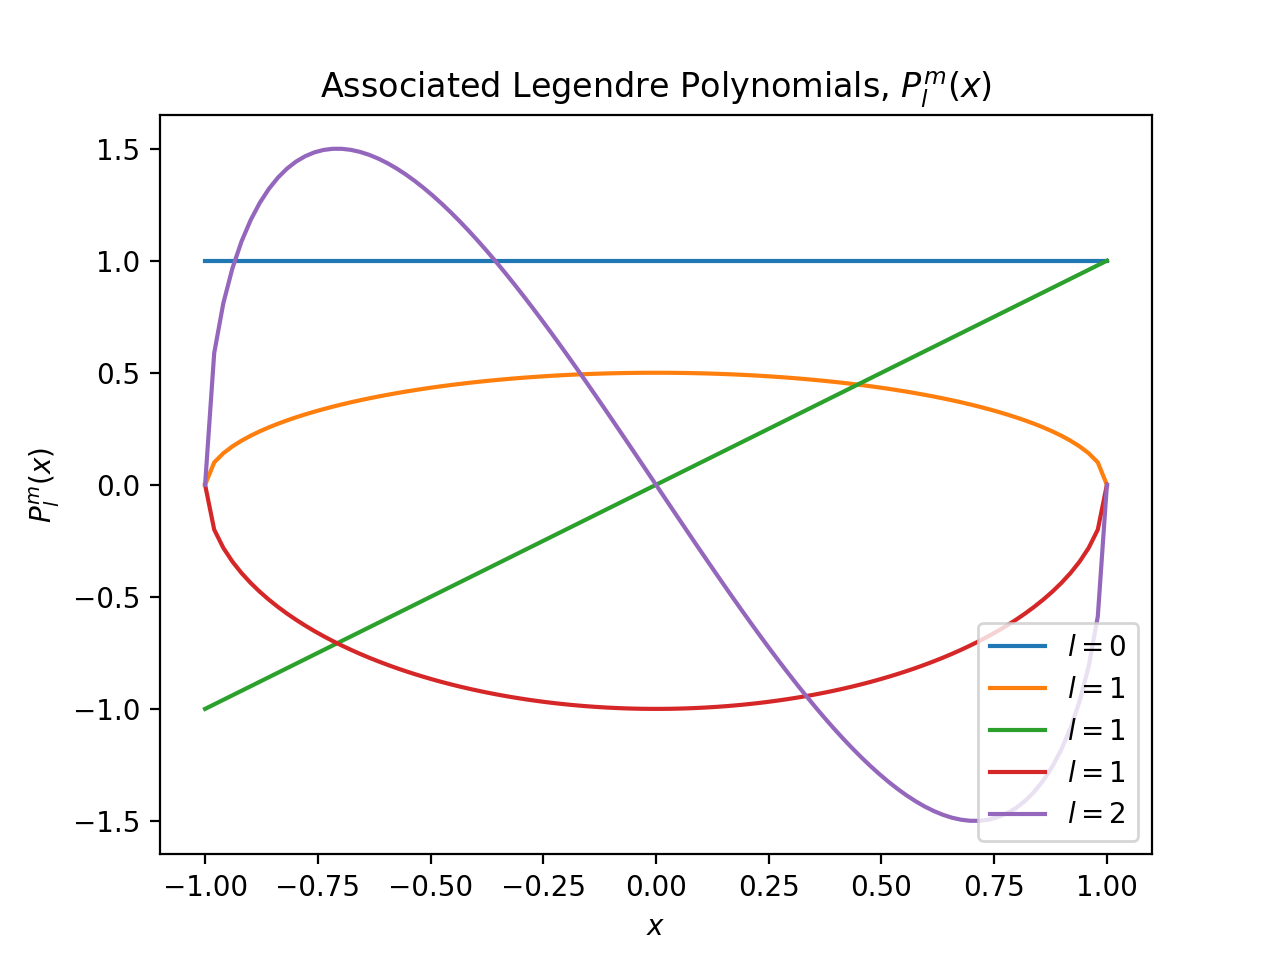

In [6]:
x=np.linspace(-1,1,100)

plt.figure()

for i in range(0, len(ls)):
    l=ls[i]
    m=ms[i]
    plt.plot(x,lpmv(m,l,x),label=r'$l=$'+str(l))
plt.title(r'Associated Legendre Polynomials, $P_l^m(x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$P_l^m(x)$')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


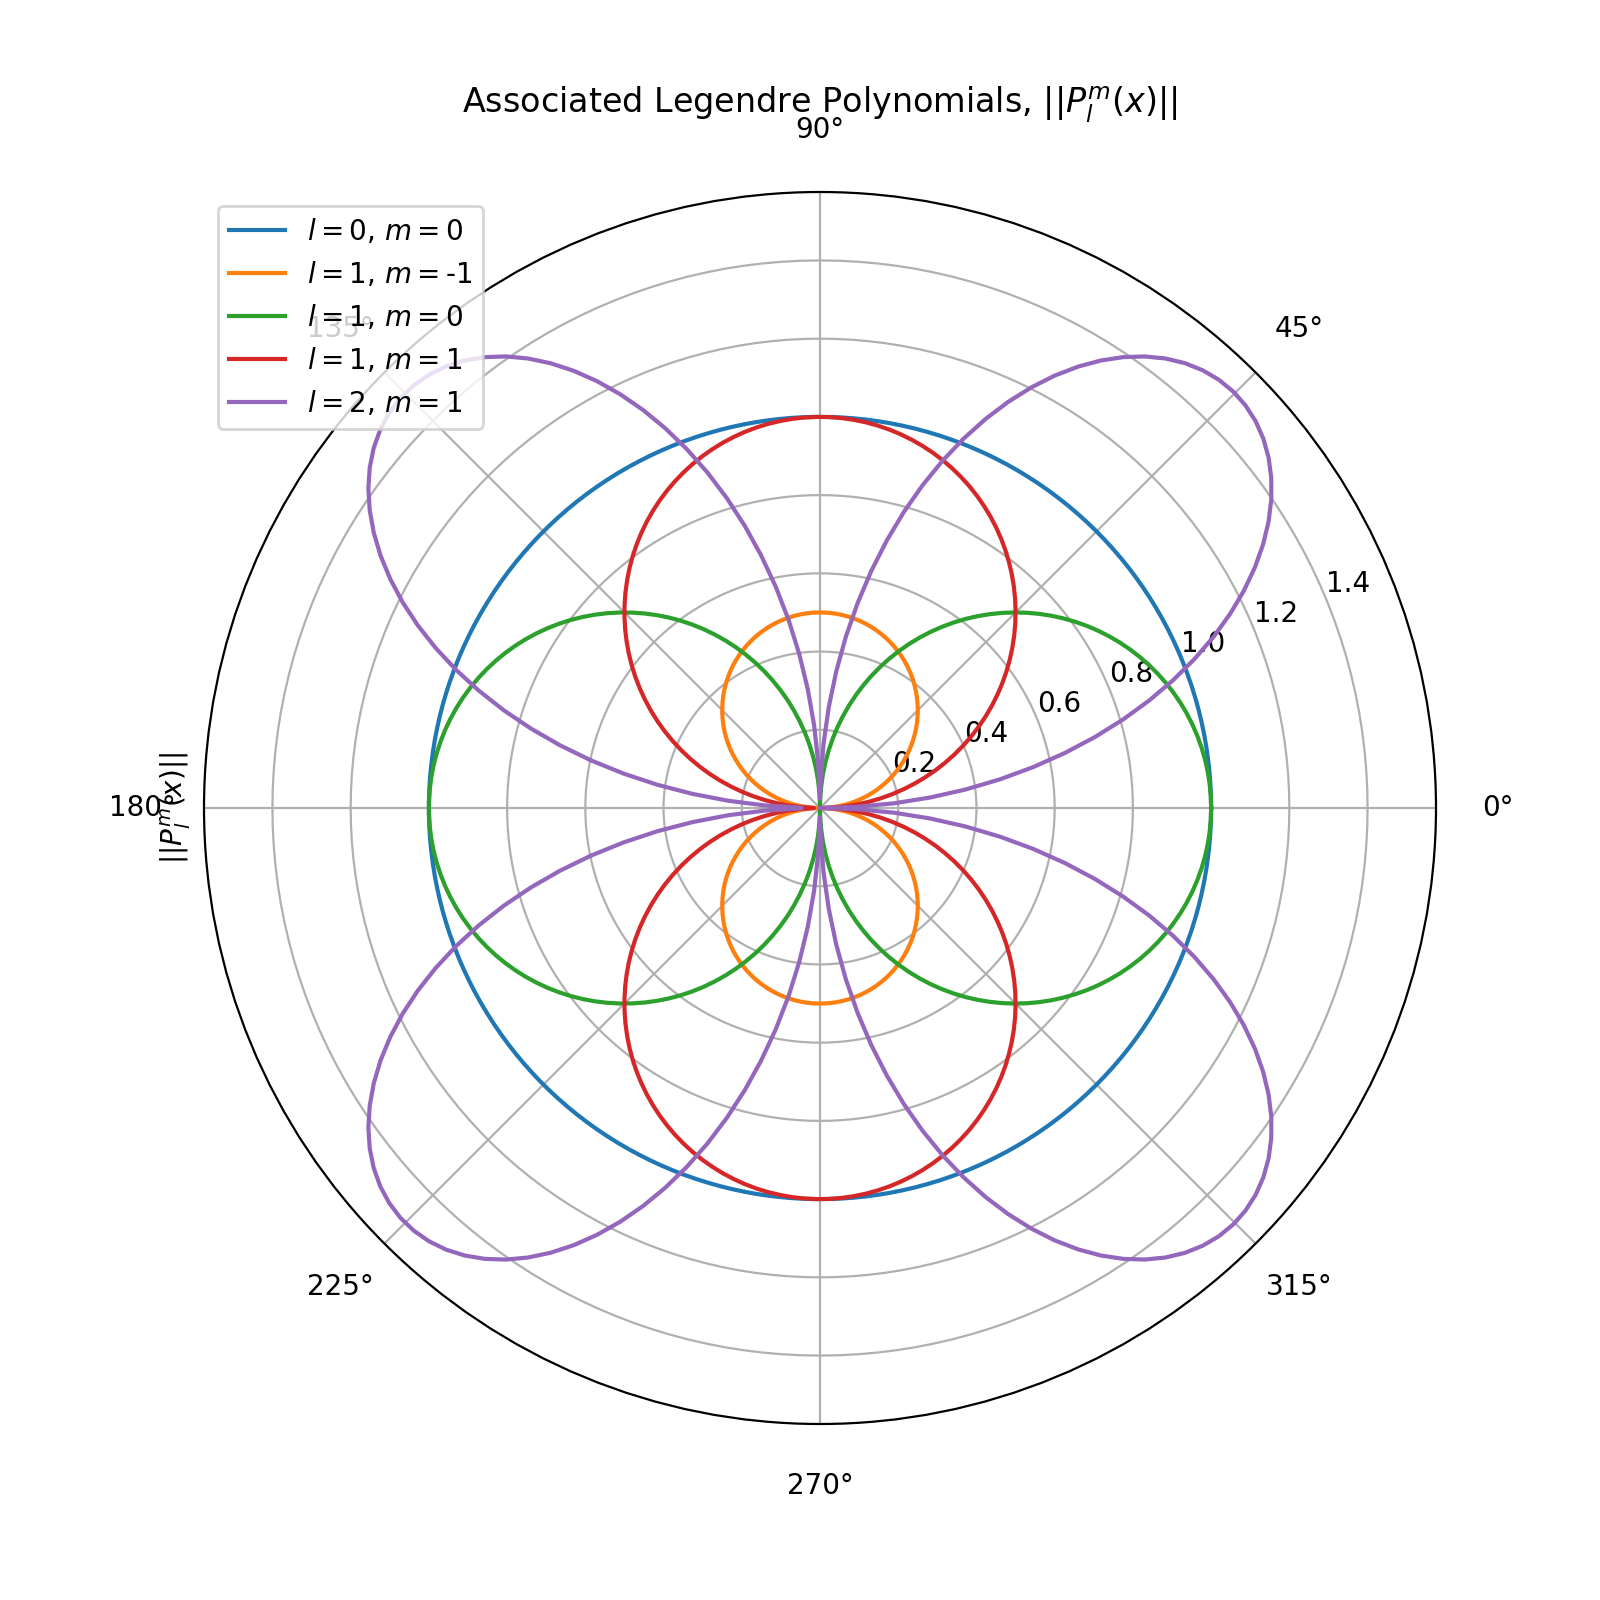

In [7]:
thetas = np.linspace(0,2*np.pi,200)

plt.figure(figsize=(8,8))
for i in range(0, len(ls)):
    l=ls[i]
    m=ms[i]
    r = lpmv(m,l,np.cos(thetas))
    plt.polar(thetas, abs(r),label=r'$l=$'+str(l)+r', $m=$'+str(m))
plt.title(r'Associated Legendre Polynomials, $||P_l^m(x)||$')
plt.ylabel(r'$||P_l^m(x)||$')
plt.legend()
plt.show()

## Spherical Harmonics
The normalized **Spherical Harmonics**, $Y(\theta,\phi)$, are defined as:
$$Y_l^m(\theta,\phi)=\epsilon \sqrt{\frac{(2l+1)}{4\pi}\frac{(l-|m|)!}{(l+|m|)!}}e^{im\phi}P_l^m(\cos \theta)$$
Where $\epsilon=(-1)^m$ for $m\geq 0$ and $\epsilon=1$ for $m\leq 0$. They appear all over the place in physics, espcially in problems involving spherical symmetry, like the Hydrogen atom.  

In [8]:
l=1
m=0

<IPython.core.display.Javascript object>


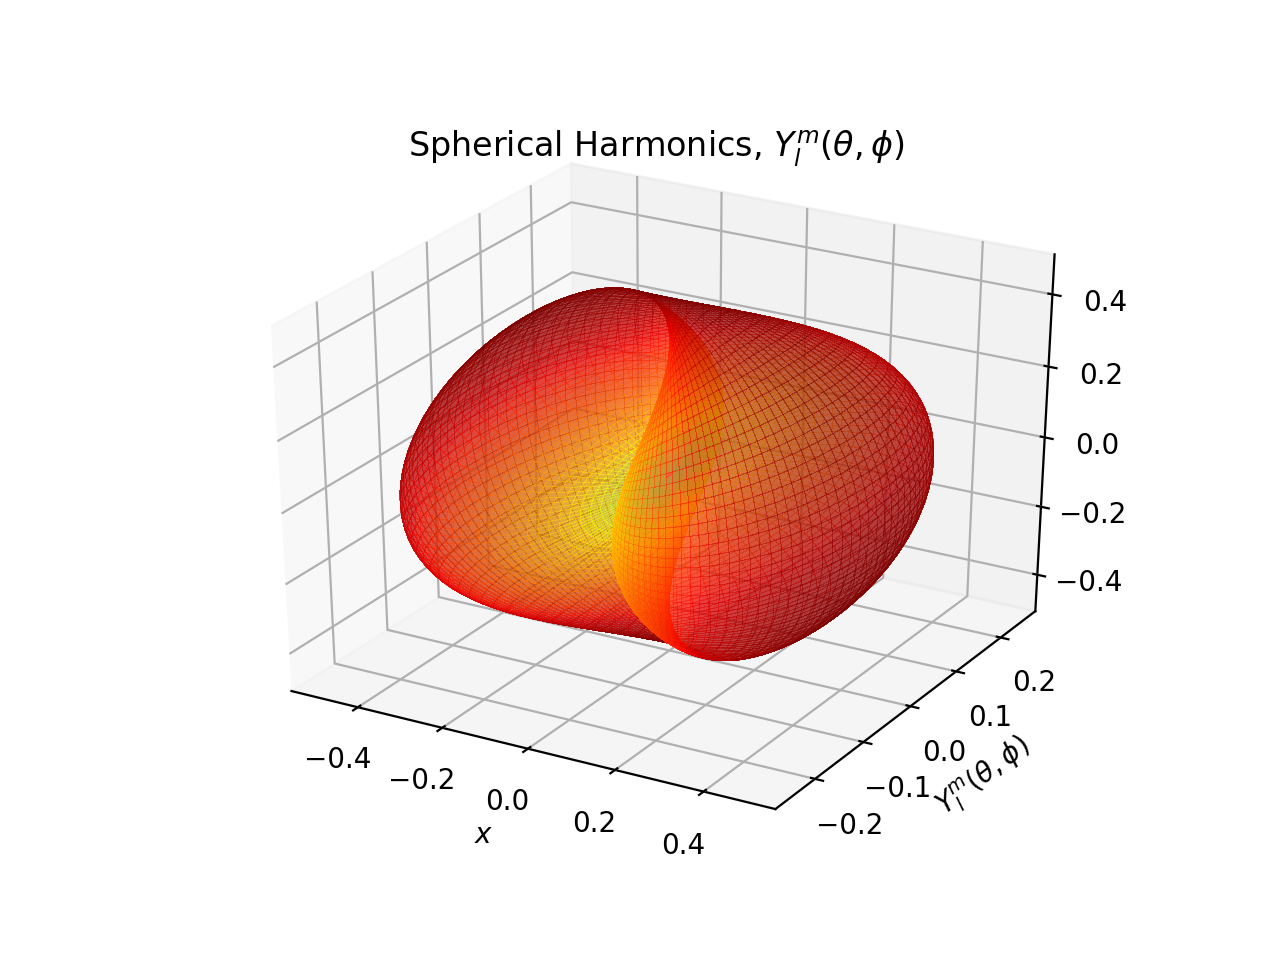

C:\Users\pakij\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [20]:
thetas = np.linspace(0, np.pi, 100)
phis = np.linspace(0, 2*np.pi, 100)

(Theta,Phi)=np.meshgrid(thetas,phis) 
s_harm=sph_harm(m, l, Phi, Theta)
   
R = abs(s_harm)
X = R * np.sin(Phi) * np.cos(Theta)
Y = R * np.sin(Phi) * np.sin(Theta)
Z = R * np.cos(Phi)

cmap = plt.get_cmap('jet')
norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),facecolors=cmap(norm(R)),
    linewidth=0, antialiased=False, alpha=0.5)
plt.title(r'Spherical Harmonics, $Y_l^m(\theta,\phi)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$Y_l^m(\theta,\phi)$')
plt.legend()
plt.show()